<a href="https://colab.research.google.com/github/panaku88/MCS-7103-Machine-Learning/blob/main/customer_support_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on last week's lecture, your assignment is to perform Exploratory Data Analysis Process (DAP) on your dataset and write a report that is at least 3 pages long. You can write as many pages as you need. The report needs to be clear and follow a step-by-step process.
1.	Present your question before and after, then the answers. The answers can be before the next step (Data Wrangling), every process or after the full process. The question that helped you select the dataset should differ from the questions you are using for the rest of the process. I have general questions to guide you through your analysis.
2.	Perform in-depth data wrangling.
3.	Provide a well-detailed Exploratory Data Analysis (EDA).
4.	Draw some conclusions based on the performed EDA.
5.	Communicate the ﬁndings in a detailed report.


**INTRODUCTION**

---



Customer satisfaction is an import growth component for any business and in this task, my main objective was to analyze the different touch points between the customer and the different departments of SONIC Company LTD. Such engagements include presales activities/data, technical assistance data, customers care data, and billing queries to find patterns and relationships for improving overall customer services and satisfaction.
What can be done to improve customer satisfaction?

1.   What can be done to improve customer satisfaction?
2.   What kind of information do I need to achieve this?
3.   What processes currently exist?
3.   How do customers reach out to us?







**DATA COLLECTION**

---



The dataset was extracted from the customer management system of SONIC Co. LTD. This includes all logged interactions (queries or complaints) between the customer and sales team, customer and customer care team, customer and billing team, customer and the field support team. The period under consideration is January 2020 to December 2023. Below are the data sources in the dataset.



1.   Presales data – captured presales data include customer requirements
2.   Technical support data – interactions between customers and technical team.
3.   Customer care team – interactions between customer support team members while following up on issues.
4.   Billing queries - records relating to customer billing issues.

After collecting the data, below are the questions that I asked myself to help me in the data analysis
1.   How do we improve customer services?
2.   How do we measure all the customer touch points.
3.   What insight can I learn from the data captured.
4.   What are the most common issues reported by customers?



**DATA WRANGLING**

---



Described in this section are the data pre-processing approach that I used to clean and organize the data. Python was chosen as the data analysis tool.
Important Python libraries: The first step in the data wrangling involved importing the python libraries Pandas, Matplotlib, Seaborn. Pandas is an open-source python data analysis and manipulation tool, Matplotlib is used to perform data visualization in python and lastly seaborn is also a data visualization tool (based on Matplotlib) and is closed integrated with the Pandas data structures making it easier to use, with beautiful statistical graphs.

**Reading the Dataset:** After extracting the raw customer support dataset, which was extracted in the CSV file format, I loaded the dataset into a Pandas Dataframe. The dataset was downloaded and named as a csv file and then loaded into Pandas data frame for cleaning and exploratory analysis.
Assessing the Dataset: the purpose of this phase was to mainly dig into the dataset and understand the structure, content and check if there are problems in the dataset. The detailed process involved looking at the features attributes in the dataset for instance the Pandas functions head()and dtypes() were useful in understanding the meaning of and datatype of each column in my dataset.

**Dataset Cleaning:** After understanding the structure and content of the dataset I realized that it was necessary to clean the data as there were some missing values and some attributes that were not important for my purpose. The process involved writing some python code that checked for any null value values and removed them, renamed certain fields as this dataset contains sensitive information.


1. Here I am importing the Google Drive Python Library which is used to connect to colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Importing the necessary Python Libraries discussed in the report write up

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random

3. Reading the raw customer dataset into a Pandas Dataframe and specifying a custom directory (output_path) to store modified dataset

In [4]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/sonic_customer_support_dataset.csv')

# Specify the path to save the modified/manipulated dataset
output_path = '/content/drive/MyDrive/MCSC1/dataset/raw_customer_support_dataset.csv'


4. Here next code cells, I am assessing the Dataset in order to understand the structure, content and check if there are problems in the dataset

In [5]:
raw_dataset.head()

,TICKET NUMBER,CUSTOMER ACCOUNT,SERVICE PLAN,SOURCE,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS),ALLOCATED TIME (HOURS)
0,SS99405205,712621,SONIC HOME INTERNET,Phone,44574.48958,Field Work,Migration - Location,Normal,Sales,0,Closed,0,0 Secs,0,0
1,SS99407920,704853,SONIC HOME INTERNET,Phone,44582.71667,Field Work,Migration - Location,Normal,Sales,0,Closed,0,0 Secs,0,0
2,SS99408652,Not Selected,Not Specified,Phone,44585.49861,Sales,New Lead,Normal,Sales,0,Closed,0,0 Secs,0,0
3,SS99411733,711973,SONIC HOME INTERNET,Phone,44595.39653,Sales,New Lead,Normal,Sales,0,Closed,0,0 Secs,0,0
4,SS99413288,718046,SONIC HOME INTERNET,Phone,44600.69792,Field Work,Migration - Location,Normal,Sales,0,Closed,0,0 Secs,0,0


In [6]:
raw_dataset.dtypes

,0
TICKET NUMBER,object
CUSTOMER ACCOUNT,object
SERVICE PLAN,object
SOURCE,object
DATE LOGGED,float64
CATEGORY,object
SUB-CATEGORY,object
PRIORITY,object
TICKET CENTER,object
TIME IDLE (MINS),int64


In [7]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234960 entries, 0 to 234959
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TICKET NUMBER           234960 non-null  object 
 1   CUSTOMER ACCOUNT        234960 non-null  object 
 2   SERVICE PLAN            234960 non-null  object 
 3   SOURCE                  234959 non-null  object 
 4   DATE LOGGED             234960 non-null  float64
 5   CATEGORY                234738 non-null  object 
 6   SUB-CATEGORY            234273 non-null  object 
 7   PRIORITY                234960 non-null  object 
 8   TICKET CENTER           234960 non-null  object 
 9   TIME IDLE (MINS)        234960 non-null  int64  
 10  TIME IDLE (DAYS)        234960 non-null  object 
 11  TIME TO CLOSE (MINS)    234960 non-null  int64  
 12  TIME TO CLOSE (DAYS)    234960 non-null  object 
 13  ALLOCATED TIME (MINS)   234960 non-null  int64  
 14  ALLOCATED TIME (HOUR

In [8]:
raw_dataset.shape

(234960, 15)

In [9]:
raw_dataset.columns

Index(['TICKET NUMBER', 'CUSTOMER ACCOUNT', 'SERVICE PLAN', 'SOURCE',
       'DATE LOGGED', 'CATEGORY', 'SUB-CATEGORY', 'PRIORITY', 'TICKET CENTER',
       'TIME IDLE (MINS)', 'TIME IDLE (DAYS)', 'TIME TO CLOSE (MINS)',
       'TIME TO CLOSE (DAYS)', 'ALLOCATED TIME (MINS)',
       'ALLOCATED TIME (HOURS)'],
      dtype='object')

In [10]:
raw_dataset.nunique()

,0
TICKET NUMBER,234960
CUSTOMER ACCOUNT,13984
SERVICE PLAN,85
SOURCE,8
DATE LOGGED,154965
CATEGORY,17
SUB-CATEGORY,111
PRIORITY,4
TICKET CENTER,39
TIME IDLE (MINS),1206


In [11]:
raw_dataset.describe()

,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS),ALLOCATED TIME (HOURS)
count,234960.000000,2.349600e+05,2.349600e+05,234960.000000,234960.000000
mean,44909.880989,4.590135e+03,1.483044e+04,431.173710,7.106512
std,200.405687,6.706565e+04,8.586100e+04,5149.102208,85.786149
min,44562.046530,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,44747.109895,0.000000e+00,3.000000e+01,0.000000,0.000000
50%,44896.442360,0.000000e+00,2.850000e+02,0.000000,0.000000
75%,45075.388190,0.000000e+00,2.179000e+03,0.000000,0.000000
max,45290.959720,1.409451e+06,1.409454e+06,335112.000000,5585.000000


In [12]:
raw_dataset.isnull().sum()

,0
TICKET NUMBER,0
CUSTOMER ACCOUNT,0
SERVICE PLAN,0
SOURCE,1
DATE LOGGED,0
CATEGORY,222
SUB-CATEGORY,687
PRIORITY,0
TICKET CENTER,0
TIME IDLE (MINS),0


5. The following are custom Python code to manipulate the dataset. Precisely, we are removing any sensitive information from the data and any missing or null values.

6. Data cleanning: After understanding the structure and content in step 5 I realized that it was necessary to clean the data as there were some missing values and some attributes that were not important for my purpose.

In [13]:
# Save the modified dataset to the specified path
raw_dataset.to_csv(output_path, index=False)

print(f"The clean_cs_dataset.csv has been created successfully at {output_path}.")
new_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/raw_customer_support_dataset.csv')

# Drop rows with 'Not Specified' or 'Not Selected'.
new_dataset = new_dataset[new_dataset.applymap(lambda x: 'Not Specified' not in
                                               str(x) and 'Not Selected' not in str(x) and 'Shared Bandwidth' not in str(x)).all(axis=1)]

# Drop the unnecessary attributes
# new_dataset = new_dataset.dropna(subset=['TICKET OWNER'])
# new_dataset = new_dataset.dropna(subset=['SOURCE'])
new_dataset = new_dataset.dropna(subset=['CATEGORY', 'SUB-CATEGORY', 'SOURCE'])
new_dataset = new_dataset.drop('ALLOCATED TIME (HOURS)', axis=1)
new_dataset = new_dataset.drop('CUSTOMER ACCOUNT', axis=1)

# Create a dictionary to map source categories into numerical values
source_mapping = {'Email': 1, 'Live Chat': 2, 'Phone': 3, 'Internal Process': 4,
                  'SMS': 5, 'Fax': 6, 'Letter': 7, 'Socials': 8}
new_dataset['SOURCE'] = new_dataset['SOURCE'].map(source_mapping)

# Save the modified dataset to the specified path
new_dataset.to_csv(output_path, index=False)

The clean_cs_dataset.csv has been created successfully at /content/drive/MyDrive/MCSC1/dataset/raw_customer_support_dataset.csv.


<ipython-input-13-ce1be4e5f6c6>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_dataset = new_dataset[new_dataset.applymap(lambda x: 'Not Specified' not in


In [14]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112184 entries, 0 to 234946
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TICKET NUMBER          112184 non-null  object 
 1   SERVICE PLAN           112184 non-null  object 
 2   SOURCE                 112184 non-null  int64  
 3   DATE LOGGED            112184 non-null  float64
 4   CATEGORY               112184 non-null  object 
 5   SUB-CATEGORY           112184 non-null  object 
 6   PRIORITY               112184 non-null  object 
 7   TICKET CENTER          112184 non-null  object 
 8   TIME IDLE (MINS)       112184 non-null  int64  
 9   TIME IDLE (DAYS)       112184 non-null  object 
 10  TIME TO CLOSE (MINS)   112184 non-null  int64  
 11  TIME TO CLOSE (DAYS)   112184 non-null  object 
 12  ALLOCATED TIME (MINS)  112184 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 12.0+ MB


In [15]:
new_dataset.shape

(112184, 13)

In [16]:
new_dataset.columns

Index(['TICKET NUMBER', 'SERVICE PLAN', 'SOURCE', 'DATE LOGGED', 'CATEGORY',
       'SUB-CATEGORY', 'PRIORITY', 'TICKET CENTER', 'TIME IDLE (MINS)',
       'TIME IDLE (DAYS)', 'TIME TO CLOSE (MINS)', 'TIME TO CLOSE (DAYS)',
       'ALLOCATED TIME (MINS)'],
      dtype='object')

In [17]:
new_dataset.head(3)

,TICKET NUMBER,SERVICE PLAN,SOURCE,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
0,SS99405205,SONIC HOME INTERNET,3,44574.48958,Field Work,Migration - Location,Normal,Sales,0,Closed,0,0 Secs,0
1,SS99407920,SONIC HOME INTERNET,3,44582.71667,Field Work,Migration - Location,Normal,Sales,0,Closed,0,0 Secs,0
3,SS99411733,SONIC HOME INTERNET,3,44595.39653,Sales,New Lead,Normal,Sales,0,Closed,0,0 Secs,0


In [19]:
new_dataset.tail(3)

,TICKET NUMBER,SERVICE PLAN,SOURCE,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
234939,RKE16063304,SONIC VPN 10Mbps,3,45273.68403,Technical Support,Troubleshooting no Connectivity,Normal,SONIC PREMIUM SUPPORT,0,Closed,124,2 Hrs 4 Mins 5 Secs,34
234945,RKE16354315,S20: SONIC Enterprise 20 Mbps,3,45290.28958,Technical Support,Troubleshooting no Connectivity,Urgent,SONIC PREMIUM SUPPORT,0,Closed,192,3 Hrs 12 Mins 44 Secs,0
234946,SS99646633,SONIC OFFICE 15Mbps,1,45203.43542,Billing and Collections,Billing Query,Normal,SONIC PREMIUM SUPPORT,0,Closed,18,18 Mins 36 Secs,0


In [20]:
new_dataset.describe()

,SOURCE,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS)
count,112184.000000,112184.000000,1.121840e+05,1.121840e+05,112184.000000
mean,2.717295,44903.345014,1.613101e+03,7.982096e+03,130.202195
std,1.255533,207.957555,3.288137e+04,5.112215e+04,1488.036557
min,1.000000,44562.050000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,44729.536635,0.000000e+00,2.500000e+01,0.000000
50%,3.000000,44885.797915,0.000000e+00,2.740000e+02,0.000000
75%,4.000000,45083.497745,0.000000e+00,1.657000e+03,0.000000
max,8.000000,45290.959720,1.038312e+06,1.261812e+06,187196.000000


In [21]:
new_dataset.isnull().sum()

,0
TICKET NUMBER,0
SERVICE PLAN,0
SOURCE,0
DATE LOGGED,0
CATEGORY,0
SUB-CATEGORY,0
PRIORITY,0
TICKET CENTER,0
TIME IDLE (MINS),0
TIME IDLE (DAYS),0


In [22]:
new_dataset.dtypes

,0
TICKET NUMBER,object
SERVICE PLAN,object
SOURCE,int64
DATE LOGGED,float64
CATEGORY,object
SUB-CATEGORY,object
PRIORITY,object
TICKET CENTER,object
TIME IDLE (MINS),int64
TIME IDLE (DAYS),object


In [23]:
new_dataset.nunique()

,0
TICKET NUMBER,112184
SERVICE PLAN,84
SOURCE,7
DATE LOGGED,87965
CATEGORY,17
SUB-CATEGORY,105
PRIORITY,4
TICKET CENTER,33
TIME IDLE (MINS),277
TIME IDLE (DAYS),291


**EXPLORATORY DATA ANALYSIS**

---



After performing the data assessment part, I was able to identify certain features that were imported for my purpose.
Some of the important features I identified from the dataset were, the complaint or query category, the time was logged and resolved, service plan of customer, incident id, the customer account with SONIC, whether query came via email, phone or self-logged by user
The features identified are subjected to bivariate analysis to understand more about the


A Bar plot to investigate the number of incidents logged per service plan

Text(6.597069444444438, 0.5, 'Customer Complaints')

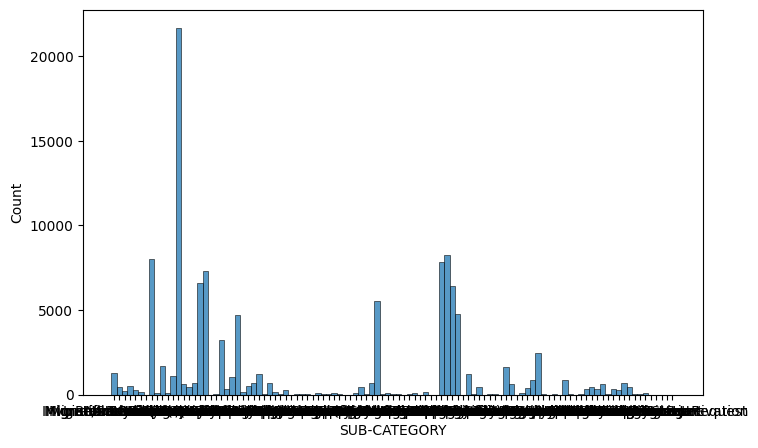

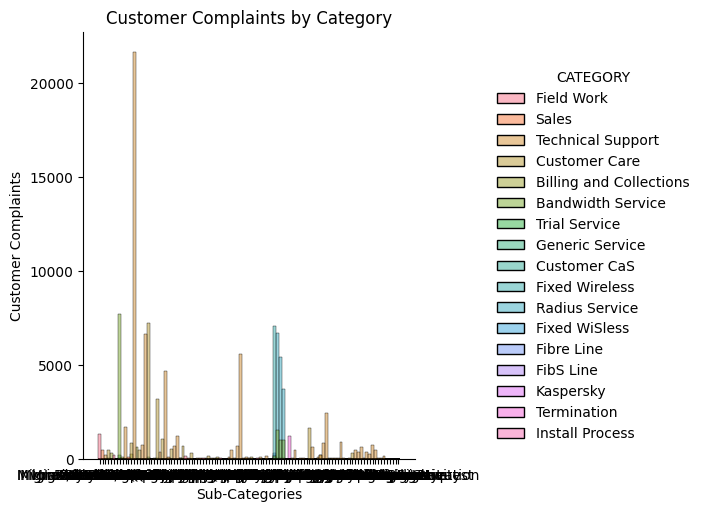

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=new_dataset, x='SUB-CATEGORY')
sns.displot(new_dataset, x="SUB-CATEGORY", hue="CATEGORY")
plt.title('Customer Complaints by Category')
plt.xlabel('Sub-Categories')
plt.ylabel('Customer Complaints')

Investigating the relationship between ticket prioroty and resolution time

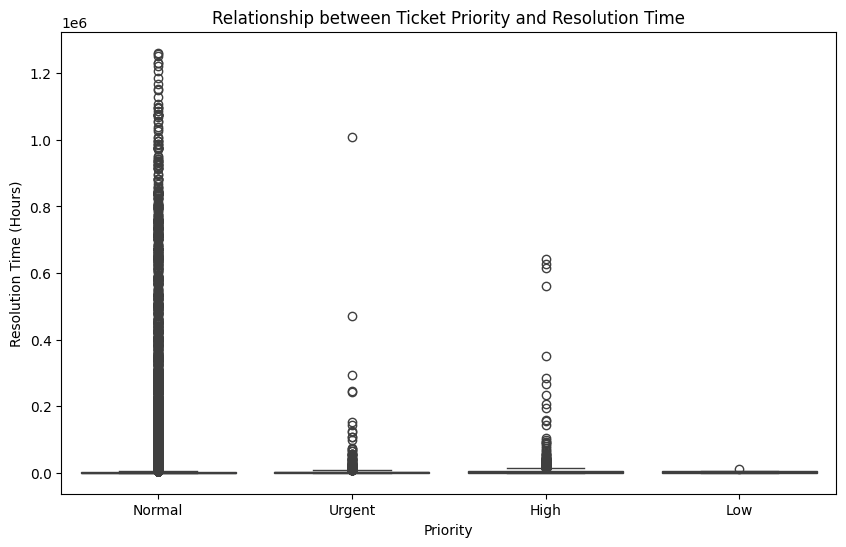

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_dataset, x='PRIORITY', y='TIME TO CLOSE (MINS)')
plt.title('Relationship between Ticket Priority and Resolution Time')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Hours)')
plt.show()

A visualization of the number of tickets by ticket source

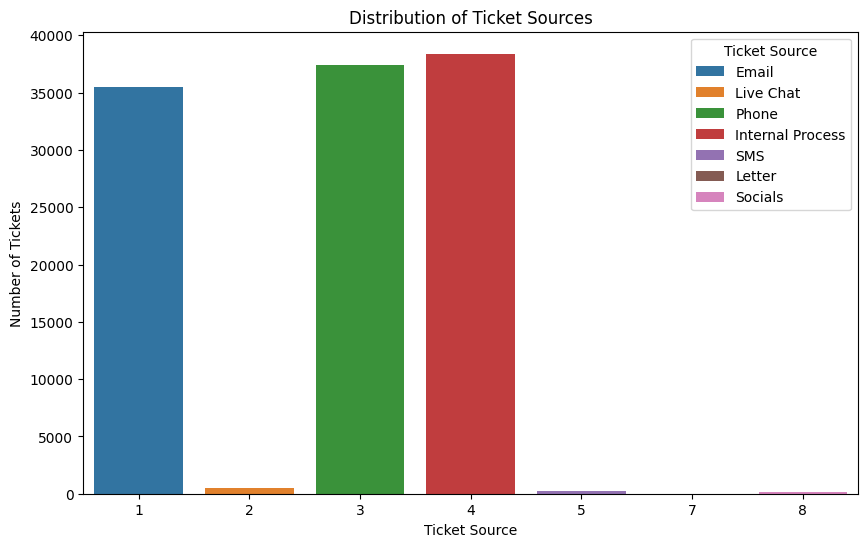

In [27]:
# Invert the source_mapping dictionary
inverted_source_mapping = {v: k for k, v in source_mapping.items()}

# Create a new column with categorical values for 'SOURCE'
new_dataset['SOURCE_CATEGORY'] = new_dataset['SOURCE'].map(inverted_source_mapping)

# Create the countplot with hue set to the new column
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='SOURCE', hue='SOURCE_CATEGORY')
plt.title('Distribution of Ticket Sources')
plt.xlabel('Ticket Source')
plt.ylabel('Number of Tickets')
plt.legend(title='Ticket Source')
plt.show()

In this section, explored the relationship between numner of tickets and ticket centers

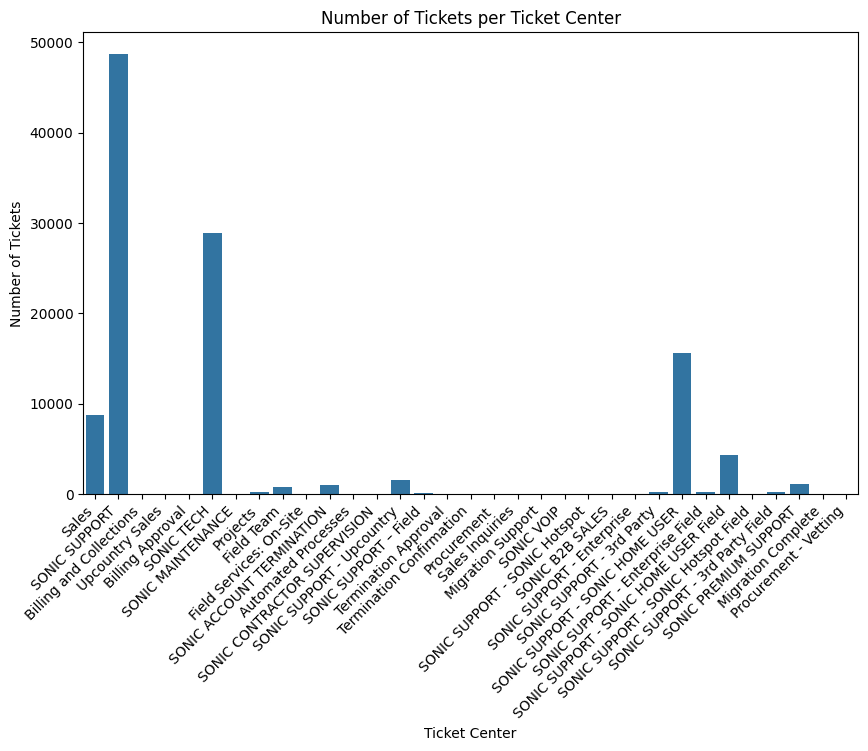

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='TICKET CENTER')
plt.title('Number of Tickets per Ticket Center')
plt.xlabel('Ticket Center')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

In this section, I plotted the correlation coefficients to quantify relationships between the numerical features.

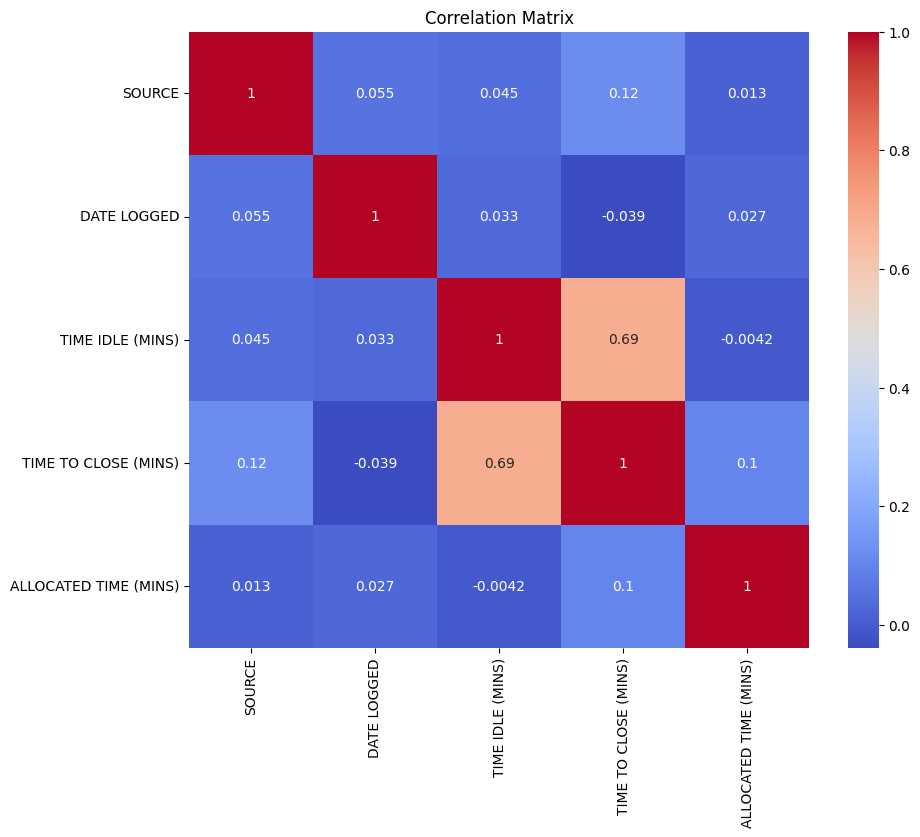

In [35]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = new_dataset.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

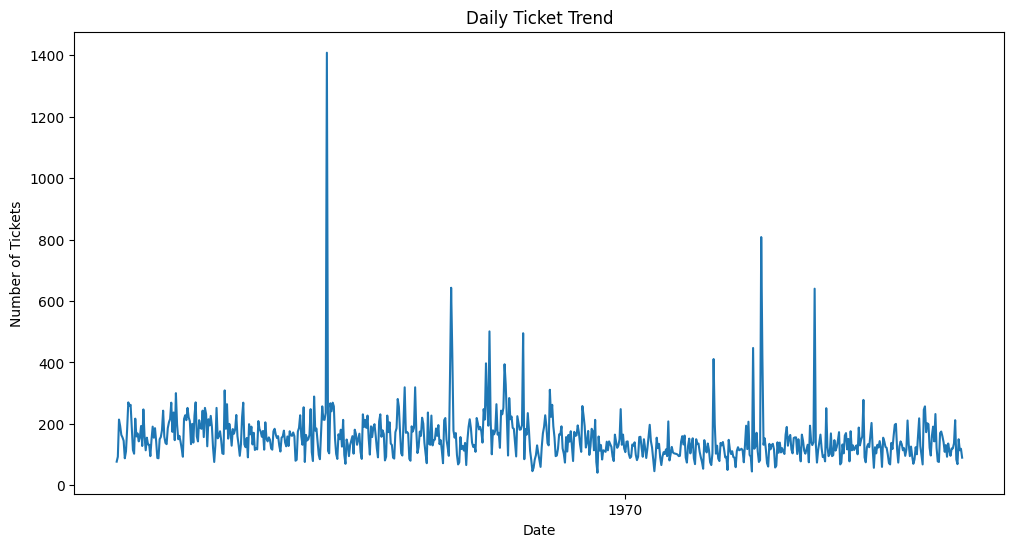

In [39]:
# Convert 'DATE LOGGED' to datetime
new_dataset['DATE LOGGED'] = pd.to_datetime(new_dataset['DATE LOGGED'])

# Group by 'DATE LOGGED' and count tickets
daily_tickets = new_dataset.groupby('DATE LOGGED')['TICKET NUMBER'].count()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_tickets)
plt.title('Daily Ticket Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

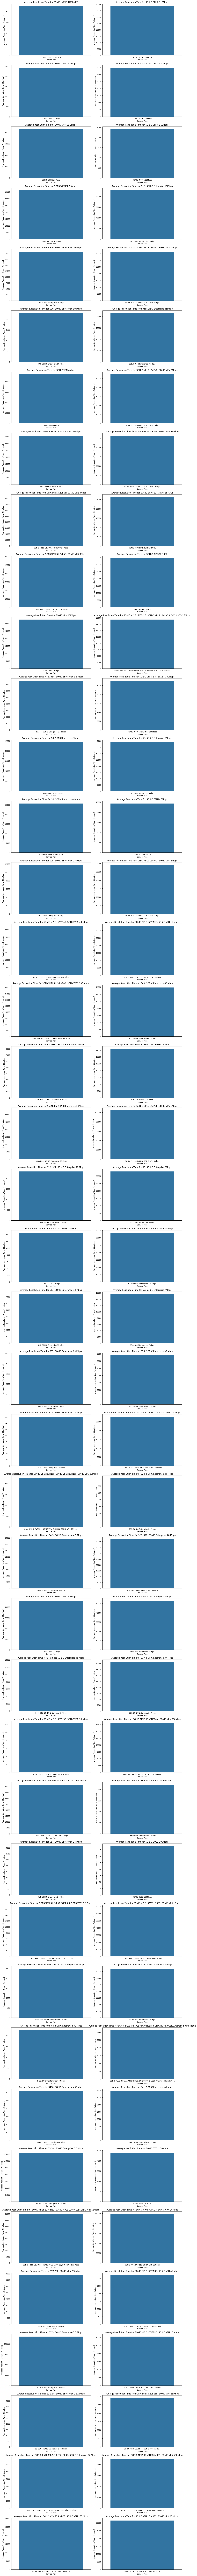

In [43]:

import math

# Calculate the number of rows and columns for subplots
n_plots = new_dataset['SERVICE PLAN'].nunique()
n_cols = 2  # Number of columns per row
n_rows = math.ceil(n_plots / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over unique service plans and create a bar plot for each
for i, service_plan in enumerate(new_dataset['SERVICE PLAN'].unique()):
    data = new_dataset[new_dataset['SERVICE PLAN'] == service_plan]
    sns.barplot(data=data, x='SERVICE PLAN', y='TIME TO CLOSE (MINS)', ax=axes[i], errorbar=None)
    axes[i].set_title(f'Average Resolution Time for {service_plan}')
    axes[i].set_xlabel('Service Plan')
    axes[i].set_ylabel('Average Resolution Time (Minutes)')

# Remove empty subplots if any
for i in range(n_plots, len(axes)):
    axes[i].remove()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
